### Implementing Fashion MNIST using CNNs

* #### The objective of this jupyter notebook is to define,compile & evaluate a 3 layer convolutional neural network(CNN) model 

* #### Visualise the validation accuracy and validation loss

In [ ]:
# Import Pandas for data manipulation using dataframes
import pandas as pd

#Import Numpy for statistical calculations
import numpy as np

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt

#Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [ ]:
# Create dataframes for train and test datasets

train_df = pd.read_csv('./data/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('./data/fashion-mnist_test.csv', sep = ',')

Now it is observed that the first column is the label data and because it has 10 classes so it is going to have from 0 to 9.The remaining columns are the actual pixel data.Here as you can see there are about 784 columns that contain pixel data.
Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.
To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras.

In [ ]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_train contains all the rows and all columns except the label column and excluding header info .
- y_train contains all the rows and first column and excluding header info .


Similarly slice the test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_test contains all the rows and all columns except the label column and excluding header info .
- y_test contains all the rows and first column and excluding header info .

####  Important Note : Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 

In [ ]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set. This is achieved using the train_test_split method of scikit learn library.

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Now let us visualise the sample image how it looks like in 28 * 28 pixel size

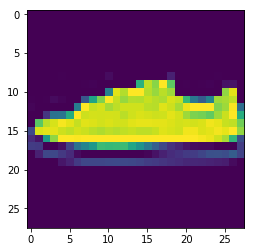

In [ ]:
image = x_train[50,:].reshape((28,28))
plt.imshow(image)
plt.show()

As you can observe above the shape of shoe from the sample image

### Create the 3D Convolutional Neural Networks (CNN)

- #### Define the model
- #### Compile the model
- #### Fit the model

First of all let us define the shape of the image before we define the model

In [ ]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

Now we need to do more formating on the x_train,x_test and x_validate sets.

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [ ]:
print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))
print("x_validate shape = {}".format(x_validate.shape))

x_train shape = (48000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)
x_validate shape = (12000, 28, 28, 1)


- #### Define the model 

In [ ]:
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=image_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [ ]:
# the model summaries# the mo 

for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [ ]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 790us/step - loss: 0.8000 - acc: 0.7347 - val_loss: 0.4603 - val_acc: 0.8389
Epoch 2/50
48000/48000 [==============================] - 36s 758us/step - loss: 0.4239 - acc: 0.8516 - val_loss: 0.3842 - val_acc: 0.8646
Epoch 3/50
48000/48000 [==============================] - 37s 770us/step - loss: 0.3685 - acc: 0.8698 - val_loss: 0.3505 - val_acc: 0.8768
Epoch 4/50
48000/48000 [==============================] - 36s 758us/step - loss: 0.3425 - acc: 0.8798 - val_loss: 0.3255 - val_acc: 0.8841
Epoch 5/50
48000/48000 [==============================] - 40s 835us/step - loss: 0.3171 - acc: 0.8879 - val_loss: 0.3169 - val_acc: 0.8861
Epoch 6/50
48000/48000 [==============================] - 38s 794us/step - loss: 0.3053 - acc: 0.8922 - val_loss: 0.3090 - val_acc: 0.8888
Epoch 7/50
48000/48000 [==============================] - 41s 849us/step - loss: 0.2932 - acc: 0.8965 - val_loss: 0.

48000/48000 [==============================] - 76s 2ms/step - loss: 0.2682 - acc: 0.9027 - val_loss: 0.2631 - val_acc: 0.9059
Epoch 10/50
48000/48000 [==============================] - 78s 2ms/step - loss: 0.2605 - acc: 0.9064 - val_loss: 0.2554 - val_acc: 0.9068
Epoch 11/50
48000/48000 [==============================] - 74s 2ms/step - loss: 0.2495 - acc: 0.9094 - val_loss: 0.2392 - val_acc: 0.9143
Epoch 12/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2356 - acc: 0.9146 - val_loss: 0.2342 - val_acc: 0.9143
Epoch 13/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2290 - acc: 0.9164 - val_loss: 0.2349 - val_acc: 0.9141
Epoch 14/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2238 - acc: 0.9199 - val_loss: 0.2265 - val_acc: 0.9157
Epoch 15/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2127 - acc: 0.9226 - val_loss: 0.2287 - val_acc: 0.9156
Epoch 16/50
48000/48000 [=====================

48000/48000 [==============================] - 143s 3ms/step - loss: 0.1994 - acc: 0.9262 - val_loss: 0.2084 - val_acc: 0.9238
Epoch 19/50
48000/48000 [==============================] - 155s 3ms/step - loss: 0.2000 - acc: 0.9251 - val_loss: 0.2039 - val_acc: 0.9251
Epoch 20/50
48000/48000 [==============================] - 154s 3ms/step - loss: 0.1916 - acc: 0.9277 - val_loss: 0.2059 - val_acc: 0.9263
Epoch 21/50
48000/48000 [==============================] - 153s 3ms/step - loss: 0.1879 - acc: 0.9291 - val_loss: 0.2007 - val_acc: 0.9277
Epoch 22/50
48000/48000 [==============================] - 163s 3ms/step - loss: 0.1855 - acc: 0.9306 - val_loss: 0.1970 - val_acc: 0.9267
Epoch 23/50
48000/48000 [==============================] - 157s 3ms/step - loss: 0.1770 - acc: 0.9341 - val_loss: 0.2010 - val_acc: 0.9261
Epoch 24/50
48000/48000 [==============================] - 153s 3ms/step - loss: 0.1744 - acc: 0.9354 - val_loss: 0.2001 - val_acc: 0.9292
Epoch 25/50
48000/48000 [==============

### Plot the Accuracy and Loss

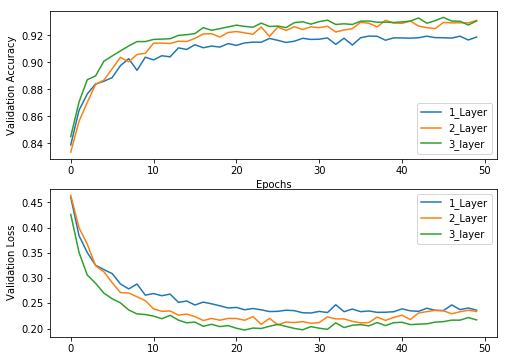

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(8,6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)

ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()  

As you can see in the above graph as the no of convolution layers increases the accuracy is increasing and loss keep decreasing